This example implements a new attribtue initializer. For more information on writing a new module implementation, see the [GitHub wiki](https://github.com/marijnkeijzer/defSim/wiki). 

In [1]:
import defSim as ds
import numpy as np
from defSim import EuclideanDistance   # imported to create instance with excluded agent attribute
import matplotlib.pyplot as plt
import networkx as nx

### A new Attribute Initializer

In [2]:
class MyAttributeInitializer(ds.AttributesInitializer):
    """
    This attribute initializer creates a group attribute (sex) and assigns one of two values (female / male) to an agent
    with equal probability. Thereafter, the values for the `num_features' desired features is drawn from a beta
    distribution. Parameters of the beta distribution are inverted for the two groups.
    """
    
    def __init__(self, beta_a=1, beta_b=1, seed=None):
        self.beta_a = beta_a
        self.beta_b = beta_b
        self.seed = seed
    
    def initialize_attributes(self, network, **kwargs):
        np.random.seed(self.seed)
        ds.set_categorical_attribute(network, 'sex', ["female", "male"])
        for j in range(kwargs.get('num_features', 1)):
            for i in network.nodes():
                if network.nodes[i]['sex'] == "female":
                    network.nodes[i]['f{:02d}'.format(j+1)] = np.random.beta(self.beta_a, self.beta_b)
                else:
                    network.nodes[i]['f{:02d}'.format(j+1)] = np.random.beta(self.beta_b, self.beta_a)

### A run with bimodal opinion distribution

The first run initializes the model with a bimodal opinion distribution. The opinions of members from the two groups are drawn from a beta distribution with $\alpha=2.5$ and $\beta=5$, and the inverse $\alpha=5$ and $\beta=2.5$

In [237]:
my_simulation = ds.Simulation(seed=3141,
                              attributes_initializer=MyAttributeInitializer(beta_a=2.5, beta_b=5, seed=3141),
                              dissimilarity_measure=EuclideanDistance(exclude=["sex"]),
                              topology="complete_graph",
                              parameter_dict={"n": 80,
                                              "confidence_level": 0.25,
                                              "convergence_rate": 0.25},
                              #communication_regime='one-to-many',
                              influenceable_attributes=["f01"],
                              influence_function="bounded_confidence",
                              tickwise=["f01"],
                              output_realizations=["Graph"],
                              max_iterations=5000)

results_bimodal = my_simulation.run_simulation()

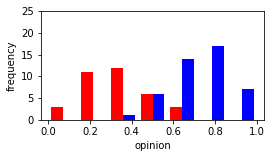

In [238]:
G = results_bimodal.loc[0, 'Graph']
sexes = [v for k, v in nx.get_node_attributes(G, 'sex').items()]
x = [results_bimodal['Tickwise_f01'][0][0], sexes]
x = list(map(list, zip(*x)))

#plt.hist(x, 10, density=False, histtype='bar')#, color=['red', 'blue'], label=['red', 'blue'])

plt.figure(figsize=[4, 2])

plt.tight_layout()

opinion_t0_male = [i for i, j in x if j == 'male']
opinion_t0_female = [i for i, j in x if j == 'female']

bins = np.linspace(0, 1, 8)

plt.hist([opinion_t0_female, opinion_t0_male], bins=bins, color=['r', 'b'])

plt.xlabel('opinion')
plt.ylabel('frequency')
plt.ylim(0, 25)

#plt.savefig('/Users/marijnkeijzer/Desktop/newatt_dist_bimodal.png', dpi=144)

plt.show()

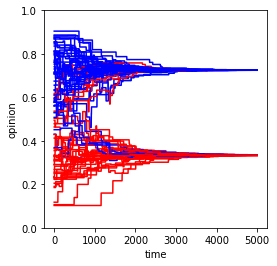

In [239]:
G = results_bimodal.loc[0, 'Graph']
sexes = [v for k, v in nx.get_node_attributes(G, 'sex').items()]

plt.figure(figsize=[4, 4])

colors = ['blue' if i == 'male' else 'red' for i in sexes]

opinions = np.array(results_bimodal['Tickwise_f01'][0]).transpose()
plt.plot(opinions[1])
for i in range(len(opinions)):
    plt.plot(opinions[i], color = colors[i])
    
plt.ylabel('opinion')
plt.xlabel('time')
plt.ylim(0, 1)

#plt.savefig('/Users/marijnkeijzer/Desktop/newatt_traj_bimodal.png', dpi=144)

plt.show()

### A run with a mixed opinion distribution

In this run we initialize the model with a mixed opinion distribution. The opinions of members from the two groups are drawn from a beta distribution with $\alpha=2.5$ and $\beta=3$, and the inverse $\alpha=3$ and $\beta=2.5$. Thus, the two groups have a small bias towards opposite ends of the opinion scale, but the distributions largely overlap.

In [270]:
#my_simulation.attributes_initializer = MyAttributeInitializer(beta_a=2, beta_b=5, seed=31415)

#results_mixed = my_simulation.run_simulation()

my_simulation = ds.Simulation(seed=3141,
                              attributes_initializer=MyAttributeInitializer(beta_a=2.5, beta_b=3, seed=3141),
                              dissimilarity_measure=EuclideanDistance(exclude=["sex"]),
                              topology="complete_graph",
                              parameter_dict={"n": 80,
                                              "confidence_level": 0.25,
                                              "convergence_rate": 0.25},
                              #communication_regime='one-to-many',
                              influenceable_attributes=["f01"],
                              influence_function="bounded_confidence",
                              tickwise=["f01"],
                              output_realizations=["Graph"],
                              max_iterations=5000)

results_mixed = my_simulation.run_simulation()

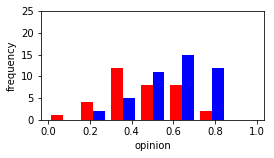

In [271]:
G = results_mixed.loc[0, 'Graph']
sexes = [v for k, v in nx.get_node_attributes(G, 'sex').items()]
x = [results_mixed['Tickwise_f01'][0][0], sexes]
x = list(map(list, zip(*x)))

#plt.hist(x, 10, density=False, histtype='bar')#, color=['red', 'blue'], label=['red', 'blue'])

plt.figure(figsize=[4, 2])

opinion_t0_male = [i for i, j in x if j == 'male']
opinion_t0_female = [i for i, j in x if j == 'female']

bins = np.linspace(0, 1, 8)

plt.hist([opinion_t0_female, opinion_t0_male], bins=bins, color=['r', 'b'])

plt.xlabel('opinion')
plt.ylabel('frequency')
plt.ylim(0, 25)

#plt.savefig('/Users/marijnkeijzer/Desktop/newatt_dist_mixed.png', dpi=144)

plt.show()

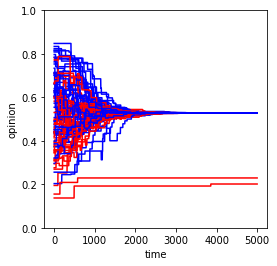

In [272]:
G = results_mixed.loc[0, 'Graph']
sexes = [v for k, v in nx.get_node_attributes(G, 'sex').items()]

plt.figure(figsize=[4, 4])

colors = ['blue' if i == 'male' else 'red' for i in sexes]

opinions = np.array(results_mixed['Tickwise_f01'][0]).transpose()
plt.plot(opinions[1])
for i in range(len(opinions)):
    plt.plot(opinions[i], color = colors[i])
    
plt.ylabel('opinion')
plt.xlabel('time')
plt.ylim(0, 1)

#plt.savefig('/Users/marijnkeijzer/Desktop/newatt_traj_mixed.png', dpi=144)

plt.show()